<a href="https://colab.research.google.com/github/JoshCast777/WordCloud_Python/blob/WordCloud_3/WordCloud_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nube de Palabras
-----
Se genera la nube de palabras basada en los votos que asignan a cada etiqueta.

Ingrese el ID del usuario de StackOverflow en español: 120346
El scraping se realiza desde la página https://es.stackoverflow.com/users/120346?tab=tags&sort=votes&page=1
Se recogieron las etiquetas y votos
Se está generando la nube de palabras


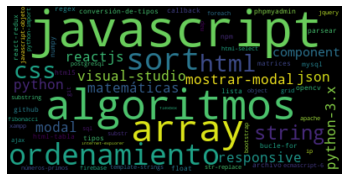

In [14]:
#Se importan las librerías
import requests as rq
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud

#Se crean las listas
tg=list()
vt=list()

#Se ingresa el ID del usuario 
id=input("Ingrese el ID del usuario de StackOverflow en español: ")

#Se empieza a realizar el web scraping
cont=0
while True:
  
  #Se guarda el link de la página
  url='https://es.stackoverflow.com/users/'+id+'?tab=tags&sort=votes&page='+str(cont+1)
  
  #Para que muestre el link solo en la primera iteración
  if cont==0:
    print("El scraping se realiza desde la página "+url)
  page=rq.get(url)
  soup=bs(page.content, 'html.parser')
  pag=soup.find('div', class_='s-pagination--item is-selected')
  
  #Esto solo para que pag!=None en la primera iteración en páginas sin paginación
  if pag==None and cont==0:
    pag='a'
  if pag!=None:
    
    #Se guardan las etiquetas y los votos
    tagTable=soup.find('table', attrs={'class':'user-tags'})
    tags=tagTable.find_all('a', class_='post-tag')
    votes=tagTable.find_all('div', class_='answer-votes')

    #Se guardan las etiquetas y votos en una lista por separados
    for i in tags:
      tg.append(i.text)
    for i in votes:
      aux=''
      if i.text=='0':
        vt.append(0.001)
      else:
        for j in i.text:
          if j!='k' and j!='m':
            aux+=j
          else:
            if j=='k':
              aux=int(aux)*10**3
            if j=='m':
              aux=int(aux)*10**6
        vt.append(int(aux))
    cont+=1
  else:
    break
print("Se recogieron las etiquetas y votos")

#Se transforma la lista de votos a tupla
vt_T=tuple(vt)

#Se crea el diccionario de datos con las etiquetas y los votos
dic=dict(zip(tg, vt_T))

#Se genera la nube de palabras
print("Se está generando la nube de palabras")
wc=WordCloud().generate_from_frequencies(dic)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()